In [1]:
pip install seaborn

Looking in indexes: https://artifactory.micron.com/artifactory/api/pypi/zextpythonorg-pypi-rel-remote/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
date = pd.read_excel("date.xlsx")
date.isnull().sum()

Unnamed: 0     0
time_point     0
aqi            0
pm2_5          0
pm10           0
so2            0
no2            0
co             0
o3             0
rank          35
quality        0
dtype: int64

In [4]:
analysisaqi = date['aqi']
cnt50 = 0
cnt100 = 0
cnt150 = 0
cnt200 = 0
cnt300 = 0
cnt500 = 0

for i in range(len(analysisaqi)):
    if analysisaqi[i] <= 50:
        cnt50 += 1
    elif analysisaqi[i] <= 100:
        cnt100 += 1
    elif analysisaqi[i] <= 150:
        cnt150 += 1
    elif analysisaqi[i] <= 200:
        cnt200 += 1
    elif analysisaqi[i] <= 300:
        cnt300 += 1
    else:
        cnt500 += 1
total = len(analysisaqi)

total, cnt50, cnt100, cnt150, cnt200, cnt300, cnt500

(3789, 363, 1934, 961, 274, 202, 55)

In [5]:
%matplotlib inline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


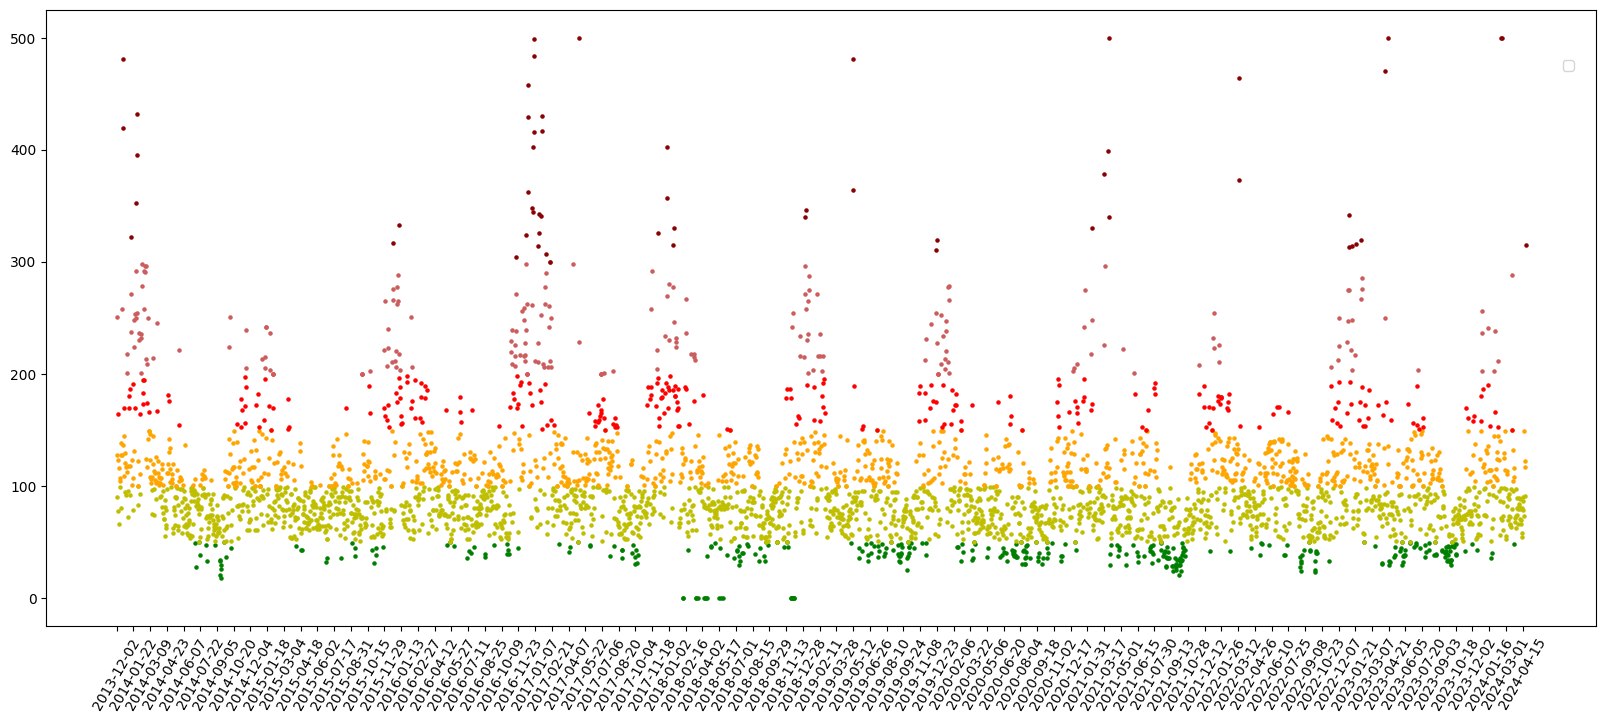

In [6]:
#画出全部AQI
x = date['time_point']
y = date['aqi']
z = date['rank']
o = date['pm2_5']
p = date['pm10']
q = date['so2']
r = date['no2']
s = date['co']
t = date['o3']
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(20, 8))
a = 50
b = 100
c = 150
d = 200
e = 300
f = 500
aa = np.ma.masked_where(y > a, y)
bb = np.ma.masked_where((y < a) | (y > b), y)
cc = np.ma.masked_where((y < b) | (y > c), y)
dd = np.ma.masked_where((y < c) | (y > d), y)
ee = np.ma.masked_where((y < d) | (y > e), y)
ff = np.ma.masked_where(y < e, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)
# aa = np.ma.masked_where(y < a, y)

# plt.axhline(y=50, xmin=0.02, xmax=0.97, color='g', linestyle="--", label='优')
# plt.axhline(y=100, xmin=0.02, xmax=0.97, color='y', linestyle="--", label='良')
# plt.axhline(y=150, xmin=0.02, xmax=0.97, color='orange', linestyle="--", label='轻度污染')
# plt.axhline(y=200, xmin=0.02, xmax=0.97, color='r', linestyle="--", label='中度污染')
# plt.axhline(y=300, xmin=0.02, xmax=0.97, color='indianred', linestyle="--", label='重度污染')
# plt.axhline(y=500, xmin=0.02, xmax=0.97, color='darkred', linestyle="--", label='严重污染')
plt.xticks(range(0, len(x), 45), rotation = 60)
# plt.xlabel('时间')
# plt.ylabel('空气质量（AQI）')
plt.scatter(x, aa, color='g', s=5)
plt.scatter(x, bb, color='y', s=5)
plt.scatter(x, cc, color='orange', s=5)
plt.scatter(x, dd, color='r', s=5)
plt.scatter(x, ee, color='indianred', s=5)
plt.scatter(x, ff, color='darkred', s=5)
# plt.plot(x, z)
plt.legend(bbox_to_anchor=(0.99,0.93), frameon=True)
plt.savefig("date.png")
plt.show()

c:\ProgramData\Anaconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\Anaconda3\envs\ds\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


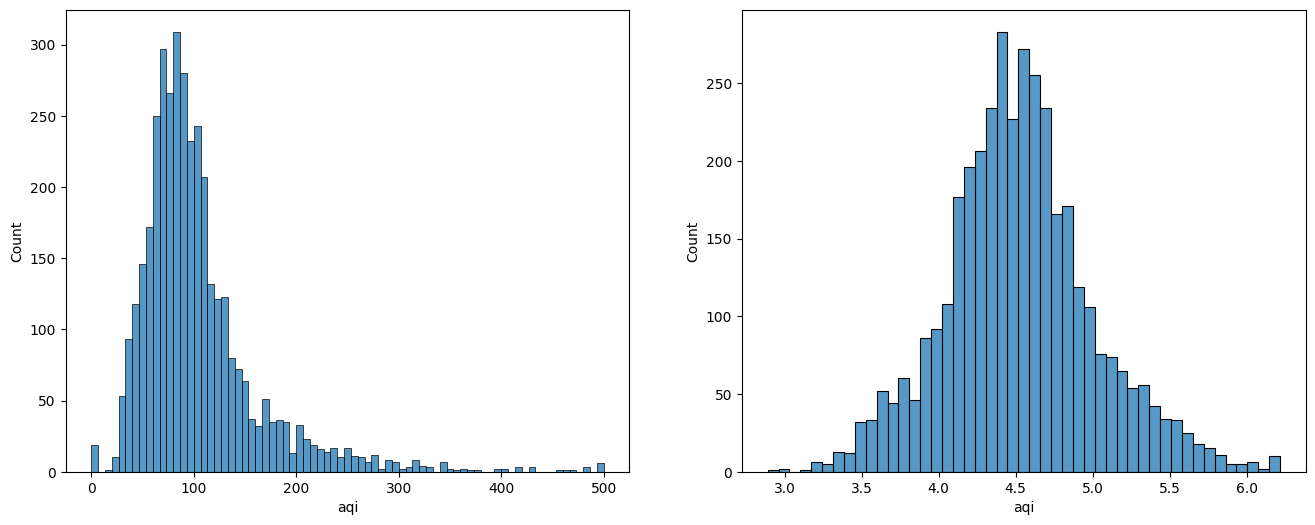

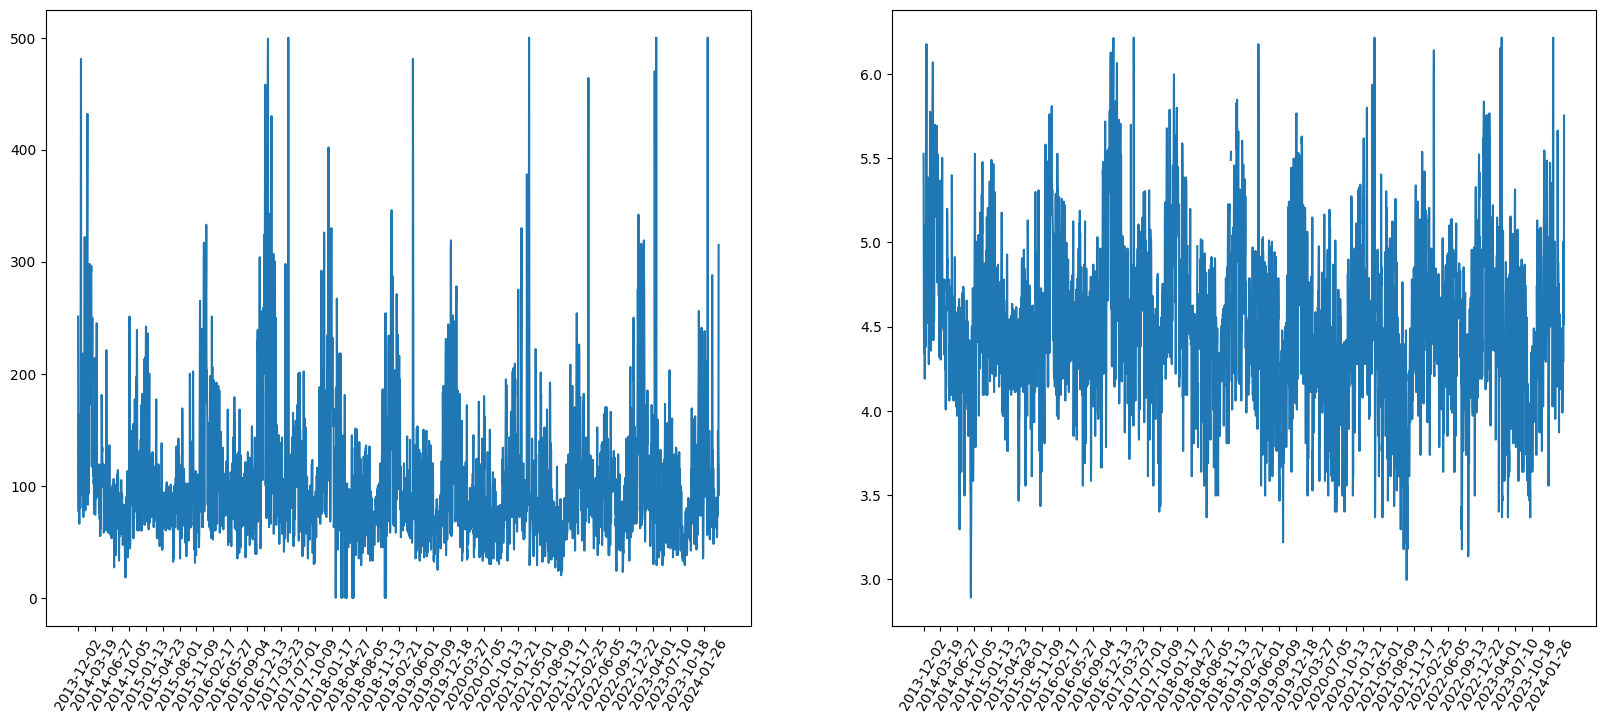

In [38]:
import seaborn as sns
datex = date['aqi']
# plt.hist(datex, bins=20)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
sns.histplot(datex, ax=ax[0])
sns.histplot(np.log(datex), ax=ax[1])
plt.show

datelog = np.log(datex)
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xticks(range(0, len(x), 100), rotation=60)

plt.subplot(1, 2, 2)
plt.plot(x, datelog)
plt.xticks(range(0, len(x), 100), rotation=60)
plt.show()

0       5.525453
1       4.844187
2       4.499810
3       4.343805
4       4.812184
          ...   
3784    5.003946
3785    4.804021
3786    4.762174
3787    4.510860
3788    5.752573
Name: aqi, Length: 3789, dtype: float64
-inf


c:\ProgramData\Anaconda3\envs\ds\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


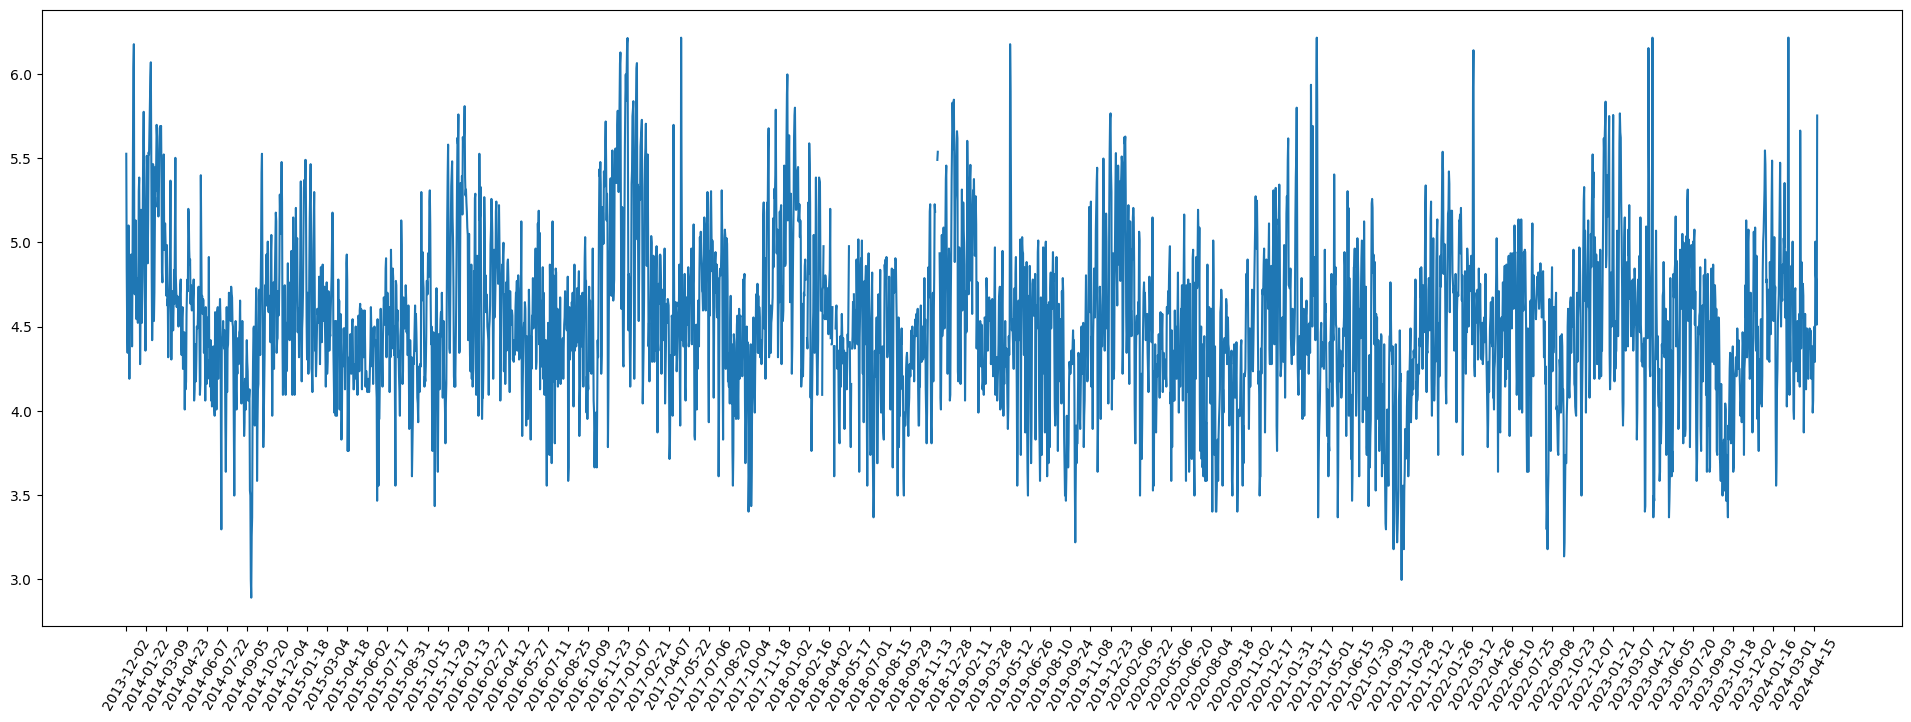

In [45]:
#3sigma
n = 3
date = pd.read_excel('date.xlsx', index_col=False)
# date_x = date['aqi']
date_y = date['time_point']
date_x = datelog
print(date_x)
xmean = date_x.mean(axis=0)
print(xmean)
xstd = np.std(date_x) #标准差
threshold1 = xmean - n * xstd
threshold2 = xmean + n * xstd

outpoint = []
outpoint_y = []

for i in range(0, len(date_x)):
    if (date_x[i] < threshold1)|(date_x[i] > threshold2):
        outpoint.append(date_x[i])
        outpoint_y.append(date_y[i])
    else:
        continue

outpoint, outpoint_y

plt.figure(figsize=(24, 8))
plt.rcParams['axes.unicode_minus'] =False
plt.axhline(y = threshold1, xmin=0.05, xmax=0.97, color='g', linestyle='--')
plt.axhline(y = threshold2, xmin=0.05, xmax=0.97, color='g', linestyle='--')
plt.xticks(range(0, len(date_y), 45), rotation=60)
plt.plot(date_y, date_x)
plt.plot(outpoint_y, outpoint, 'ro')
for i in range(len(outpoint)):
    plt.annotate(outpoint[i], xy=(outpoint_y[i], outpoint[i]), xytext=(outpoint_y[i], outpoint[i]))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x222c7c783d0>,
 'caps': [<matplotlib.lines.Line2D at 0x222c78b6090>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ca550c10>],
 'medians': [<matplotlib.lines.Line2D at 0x222ca5502d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x222c7c33090>],
 'means': []}

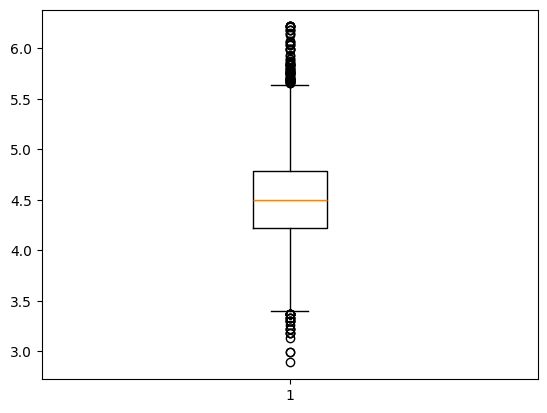

In [30]:
#箱线图
inp = [datelog]
plt.boxplot(inp)

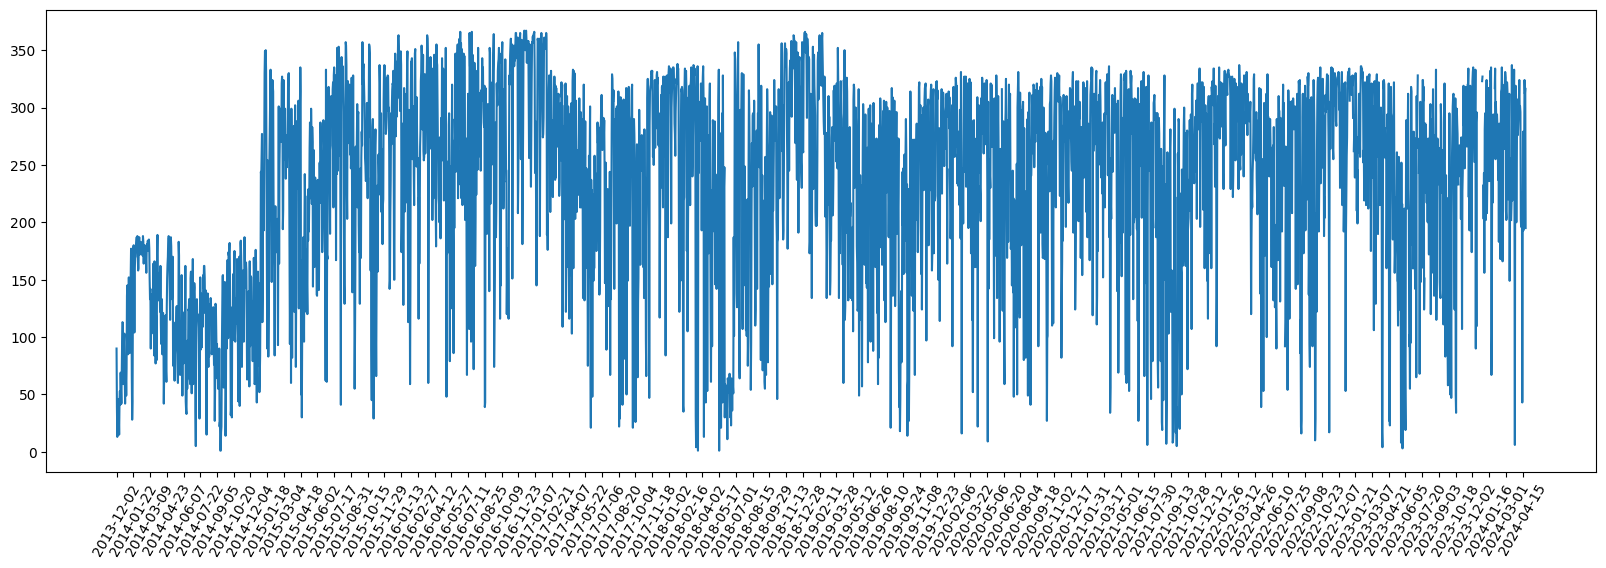

In [10]:
plt.figure(figsize=(20, 6))
plt.xticks(range(0, len(x), 45), rotation = 60)
plt.plot(x, z)